In [1]:
# Install yfinance module,if already don't have.
!pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 206.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293378 sha256=03993df2a82eb68d54dc50d94b080377a623ab44b15bbe58a604d754b1ff1aca
  Stored in directory: /tmp/pip-ephem-wheel-cache-6acz017h/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


# 1. Importing Necessary Libraries.

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#ignoring the warnings.
import warnings
warnings.filterwarnings('ignore')

# 2. Downloading Data Using yFinance module.

In [4]:
# Downloading data from Yahoo Finance
Starting_Date = '2001-01-02'
Ending_Date = '2022-03-31'
bse_data = yf.download('^BSESN', start=Starting_Date, end=Ending_Date)

[*********************100%%**********************]  1 of 1 completed


# 3. Data Preparation.

In [5]:
# Renaming columns for consistency.
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace=True)

In [6]:
# Resetting index and renaming date column.
bse_data.reset_index(inplace=True)
bse_data.rename(columns={'Date': 'date'}, inplace=True)

In [7]:
# Converting date column to datetime format.
bse_data['date'] = pd.to_datetime(bse_data['date'], format='%Y-%m-%d')

In [8]:
df = pd.DataFrame(bse_data)

# 4. Exploratory Data Analysis (EDA).

In [9]:
df.head()

,date,open,high,low,close,adjclose,volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [10]:
df.shape

(5234, 7)

In [11]:
df.describe()

,date,open,high,low,close,adjclose,volume
count,5234,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5.234000e+03
mean,2011-08-05 14:23:20.382116864,20730.703656,20852.426787,20566.845408,20708.575327,20708.575327,7.618523e+04
min,2001-01-02 00:00:00,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,2006-04-04 06:00:00,9360.459717,9445.907959,9271.629883,9372.772461,9372.772461,9.200000e+03
50%,2011-07-25 12:00:00,18185.750000,18312.415039,18040.544922,18176.209961,18176.209961,1.360000e+04
75%,2016-12-06 18:00:00,28552.363281,28696.444336,28401.439941,28504.170898,28504.170898,2.040000e+04
max,2022-03-30 00:00:00,62156.480469,62245.429688,61624.648438,61765.589844,61765.589844,3.181510e+07
std,NaN,13869.156335,13922.250221,13777.754593,13850.944949,13850.944949,1.034663e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5234 non-null   datetime64[ns]
 1   open      5234 non-null   float64       
 2   high      5234 non-null   float64       
 3   low       5234 non-null   float64       
 4   close     5234 non-null   float64       
 5   adjclose  5234 non-null   float64       
 6   volume    5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


# 5. Visualizing Trends, and Insights. 

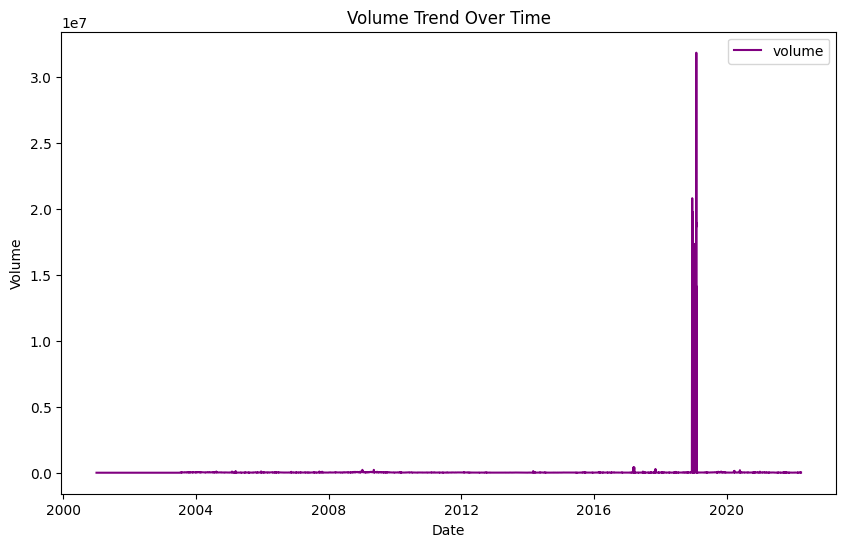

In [13]:
# Volume Trend Over Time.
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['volume'], color='purple', label='volume')
plt.title("Volume Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

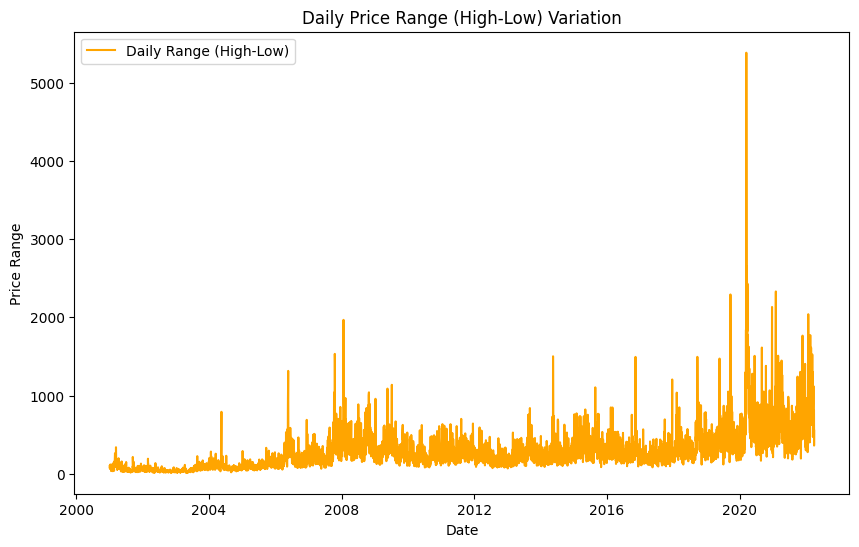

In [14]:
# Daily Price Range (High-Low) Variation.
df['daily_range'] = df['high'] - df['low']
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['daily_range'], color='orange', label='Daily Range (High-Low)')
plt.title("Daily Price Range (High-Low) Variation")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.legend()
plt.show()

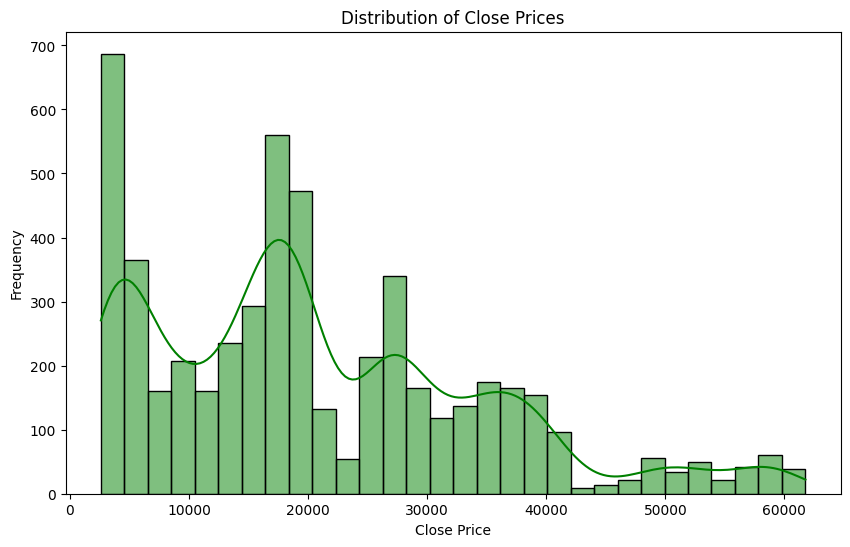

In [15]:
# Distribution of Close Prices.
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=30, kde=True, color='green')
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

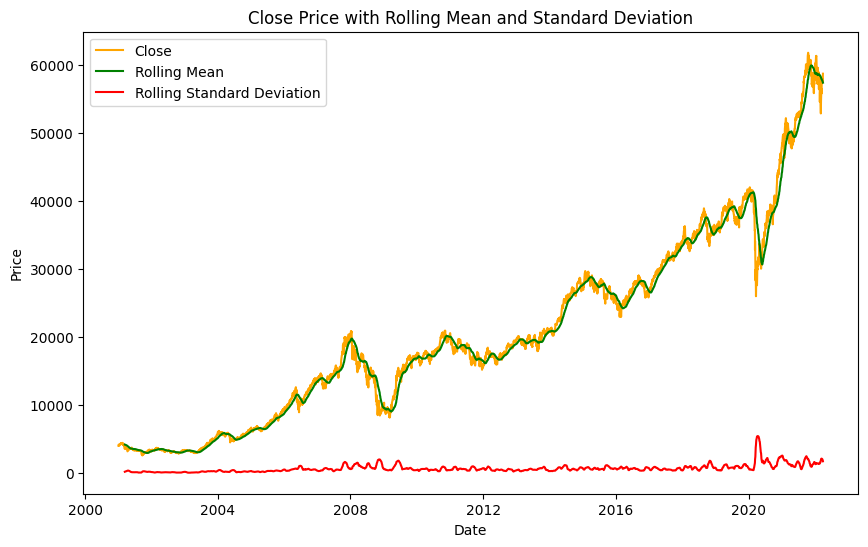

In [16]:
# Plotting Close price with Rolling Mean and Standard Deviation
close = df['close']
ma = close.rolling(window=50).mean()
std = close.rolling(window=50).std()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], color='orange', label='Close')
plt.plot(df['date'], ma, color='green', label='Rolling Mean')
plt.plot(df['date'], std, color='red', label='Rolling Standard Deviation')

plt.title("Close Price with Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

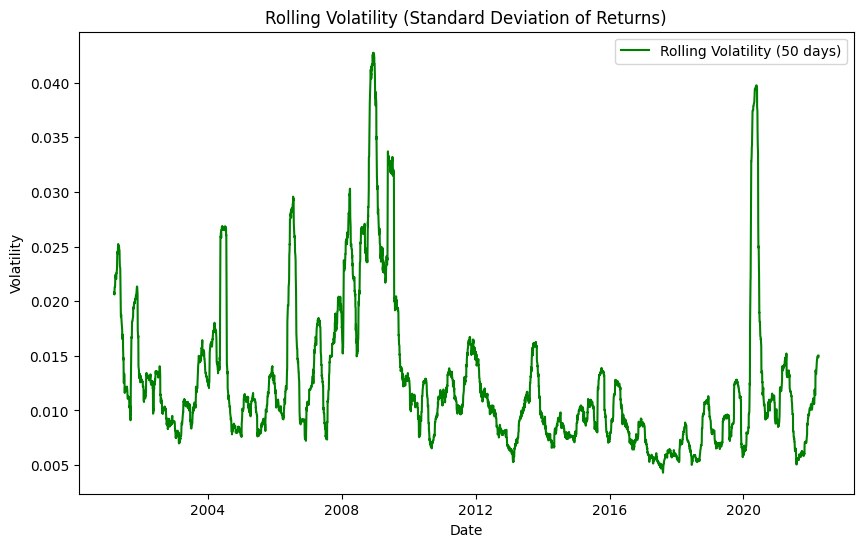

In [17]:
# Rolling Volatility (Standard Deviation of Returns).
returns = df['close'].pct_change()
rolling_volatility = returns.rolling(window=50).std()
plt.figure(figsize=(10, 6))
plt.plot(df['date'], rolling_volatility, color='green', label='Rolling Volatility (50 days)')
plt.title("Rolling Volatility (Standard Deviation of Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

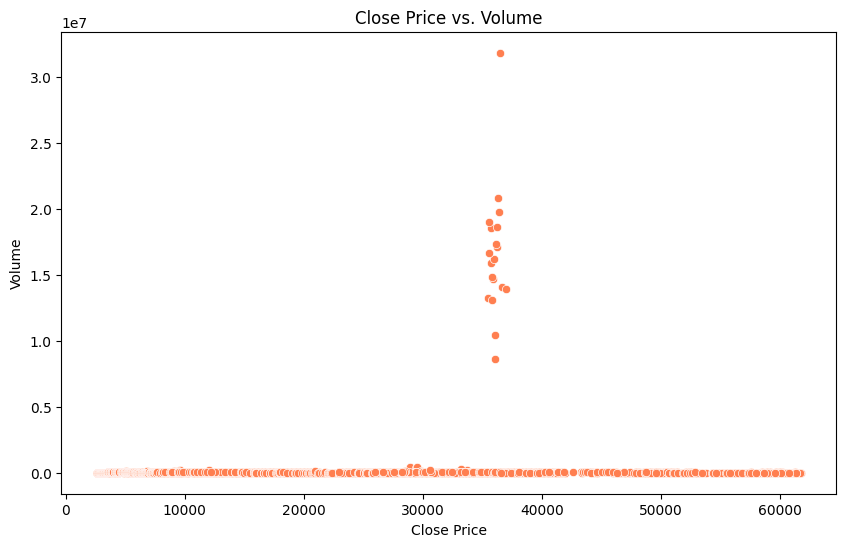

In [18]:
# Scatter Plot: Close Price vs. Volume.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='close', y='volume', color='coral')
plt.title("Close Price vs. Volume")
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.show()

# 6. Saving The Data Into a CSV File for Future Use.

In [19]:
# Saving data to CSV file in Kaggle notebook working directory.
df.to_csv('/kaggle/working/BSESN.csv', index=False)

In [20]:
# Verifying saved CSV file in Kaggle notebook working directory.
import os
file_path = '/kaggle/working/BSESN.csv'
if os.path.exists(file_path):
    print(f"File '{file_path}' saved successfully.")
else:
    print(f"File '{file_path}' saving failed or does not exist.")

File '/kaggle/working/BSESN.csv' saved successfully.
